# 🚗 Traffic Flow Analysis & Prediction System

## **A Comprehensive Data Science Project**

---

### **Project Overview**
This project analyzes urban traffic patterns to predict vehicle flow at different junctions. Using time-series analysis and machine learning, we develop models that can help city planners optimize traffic management and reduce congestion.

### **Business Problem**
Urban traffic congestion costs billions annually in lost productivity and increased emissions. This project aims to:
- Identify peak traffic hours and patterns across junctions
- Understand temporal factors affecting traffic flow
- Build predictive models for traffic volume forecasting
- Provide actionable insights for traffic management

### **Key Skills Demonstrated**
- **Data Wrangling & Cleaning**: Pandas, NumPy
- **Exploratory Data Analysis (EDA)**: Statistical analysis, pattern recognition
- **Data Visualization**: Matplotlib, Seaborn, Plotly
- **Feature Engineering**: Time-based feature extraction
- **Machine Learning**: Regression models, model evaluation
- **Statistical Analysis**: Correlation analysis, distribution analysis

## 📑 Table of Contents

1. [Setup & Imports](#1-setup--imports)
2. [Data Loading & Initial Exploration](#2-data-loading--initial-exploration)
3. [Data Cleaning & Preprocessing](#3-data-cleaning--preprocessing)
4. [Feature Engineering](#4-feature-engineering)
5. [Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
   - 5.1 Univariate Analysis
   - 5.2 Bivariate Analysis
   - 5.3 Time Series Analysis
   - 5.4 Correlation Analysis
   - 5.5 Stationarity Analysis (ADF Test)
6. [Statistical Analysis](#6-statistical-analysis)
7. [Machine Learning Models](#7-machine-learning-models)
   - 7.1 Data Preparation (Time-Based Split)
   - 7.2 Linear Regression
   - 7.3 Random Forest Regressor
   - 7.4 Gradient Boosting Regressor
   - 7.5 LSTM Neural Network (Deep Learning)
8. [Model Comparison & Evaluation](#8-model-comparison--evaluation)
9. [Conclusions & Business Insights](#9-conclusions--business-insights)
10. [Future Improvements](#10-future-improvements)

---
## 1. Setup & Imports

Importing all necessary libraries for data manipulation, visualization, and machine learning.

In [88]:
# Install required packages (uncomment if needed)
# !pip install plotly statsmodels tensorflow

# Data Manipulation & Processing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Handle Plotly import gracefully
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
    print("✅ Plotly imported successfully!")
except ImportError:
    PLOTLY_AVAILABLE = False
    print("⚠️ Plotly not installed. Install with: pip install plotly")
    print("   Continuing without interactive visualizations...")

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Statistical Analysis
from scipy import stats

# Time Series Stationarity Test
try:
    from statsmodels.tsa.stattools import adfuller
    STATSMODELS_AVAILABLE = True
    print("✅ Statsmodels imported successfully!")
except ImportError:
    STATSMODELS_AVAILABLE = False
    print("⚠️ Statsmodels not installed. Install with: pip install statsmodels")

# Deep Learning (LSTM)
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    TENSORFLOW_AVAILABLE = True
    print(f"✅ TensorFlow {tf.__version__} imported successfully!")
except ImportError:
    TENSORFLOW_AVAILABLE = False
    print("⚠️ TensorFlow not installed. Install with: pip install tensorflow")
    print("   LSTM model will be skipped...")

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\n" + "=" * 50)
print("✅ All core libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")
print("=" * 50)

✅ Plotly imported successfully!
✅ Statsmodels imported successfully!
✅ TensorFlow 2.20.0 imported successfully!

✅ All core libraries imported successfully!
📊 Pandas version: 2.3.3
🔢 NumPy version: 2.3.5


---
## 2. Data Loading & Initial Exploration

Loading the traffic dataset and performing initial data quality assessment.

In [89]:
# Load the dataset
df = pd.read_csv('Dataset/traffic.csv')

# Display basic information
print("=" * 60)
print("📁 DATASET LOADED SUCCESSFULLY")
print("=" * 60)
print(f"\n📏 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "=" * 60)
print("👀 FIRST 5 ROWS OF THE DATASET")
print("=" * 60)
df.head()

📁 DATASET LOADED SUCCESSFULLY

📏 Dataset Shape: 48,120 rows × 4 columns
💾 Memory Usage: 4.22 MB

👀 FIRST 5 ROWS OF THE DATASET


DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041

In [90]:
# Last 5 rows to check data consistency
print("=" * 60)
print("👀 LAST 5 ROWS OF THE DATASET")
print("=" * 60)
df.tail()

👀 LAST 5 ROWS OF THE DATASET


DateTime  Junction  Vehicles           ID
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

In [91]:
# Dataset info and data types
print("=" * 60)
print("📋 DATASET INFORMATION")
print("=" * 60)
df.info()
print("\n" + "=" * 60)
print("📊 DATA TYPES BREAKDOWN")
print("=" * 60)
print(df.dtypes.value_counts())

📋 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

📊 DATA TYPES BREAKDOWN
int64     3
object    1
Name: count, dtype: int64


In [92]:
# Statistical summary
print("=" * 60)
print("📈 STATISTICAL SUMMARY")
print("=" * 60)
df.describe().T.style.background_gradient(cmap='Blues')

📈 STATISTICAL SUMMARY


In [93]:
# Data Quality Assessment
print("=" * 60)
print("🔍 DATA QUALITY ASSESSMENT")
print("=" * 60)

# Missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': df.isnull().sum().values,
    'Missing %': (df.isnull().sum().values / len(df) * 100).round(2),
    'Data Type': df.dtypes.values
})
missing_data['Status'] = missing_data['Missing Values'].apply(lambda x: '✅ Complete' if x == 0 else '⚠️ Has Missing')

print("\n📋 Missing Values Summary:")
print(missing_data.to_string(index=False))

# Unique values per column
print("\n\n📊 Unique Values per Column:")
for col in df.columns:
    print(f"  • {col}: {df[col].nunique():,} unique values")

🔍 DATA QUALITY ASSESSMENT

📋 Missing Values Summary:
  Column  Missing Values  Missing % Data Type     Status
DateTime               0       0.00    object ✅ Complete
Junction               0       0.00     int64 ✅ Complete
Vehicles               0       0.00     int64 ✅ Complete
      ID               0       0.00     int64 ✅ Complete


📊 Unique Values per Column:
  • DateTime: 14,592 unique values
  • Junction: 4 unique values
  • Vehicles: 141 unique values
  • ID: 48,120 unique values


In [94]:
# Convert DateTime column to proper datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"🔄 Duplicate Rows Found: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✅ Duplicates removed. New shape: {df.shape}")
else:
    print("✅ No duplicate rows found!")

# Display cleaned data info
print(f"\n📏 Final Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

🔄 Duplicate Rows Found: 0
✅ No duplicate rows found!

📏 Final Dataset Shape: 48,120 rows × 4 columns


In [95]:
## 4. Feature Engineering

##Creating new features from existing data to improve model performance and enable deeper analysis.

In [96]:
# Extract temporal features from DateTime
print("=" * 60)
print("⚙️ FEATURE ENGINEERING - Temporal Features")
print("=" * 60)

# Time-based features
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['DayName'] = df['DateTime'].dt.day_name()
df['WeekOfYear'] = df['DateTime'].dt.isocalendar().week.astype(int)
df['Quarter'] = df['DateTime'].dt.quarter
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Time of day categorization
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)

# Rush hour indicator
def is_rush_hour(hour):
    return 1 if (7 <= hour <= 9) or (17 <= hour <= 19) else 0

df['IsRushHour'] = df['Hour'].apply(is_rush_hour)

print("✅ Created temporal features:")
print("   • Year, Month, Day, Hour")
print("   • DayOfWeek, DayName, WeekOfYear, Quarter")
print("   • IsWeekend, TimeOfDay, IsRushHour")

# Display sample of engineered features
print("\n📋 Sample of engineered features:")
df[['DateTime', 'Hour', 'DayName', 'TimeOfDay', 'IsWeekend', 'IsRushHour', 'Vehicles']].head(10)

⚙️ FEATURE ENGINEERING - Temporal Features
✅ Created temporal features:
   • Year, Month, Day, Hour
   • DayOfWeek, DayName, WeekOfYear, Quarter
   • IsWeekend, TimeOfDay, IsRushHour

📋 Sample of engineered features:


DateTime  Hour DayName TimeOfDay  IsWeekend  IsRushHour  Vehicles
0 2015-11-01 00:00:00     0  Sunday     Night          1           0        15
1 2015-11-01 01:00:00     1  Sunday     Night          1           0        13
2 2015-11-01 02:00:00     2  Sunday     Night          1           0        10
3 2015-11-01 03:00:00     3  Sunday     Night          1           0         7
4 2015-11-01 04:00:00     4  Sunday     Night          1           0         9
5 2015-11-01 05:00:00     5  Sunday   Morning          1           0         6
6 2015-11-01 06:00:00     6  Sunday   Morning          1           0         9
7 2015-11-01 07:00:00     7  Sunday   Morning          1           1         8
8 2015-11-01 08:00:00     8  Sunday   Morning          1           1        11
9 2015-11-01 09:00:00     9  Sunday   Morning          1           1        12

In [97]:
# Create additional derived features
print("=" * 60)
print("⚙️ FEATURE ENGINEERING - Derived Features")
print("=" * 60)

# IMPORTANT: Sort by DateTime to maintain time series order
df = df.sort_values(['Junction', 'DateTime']).reset_index(drop=True)

# Lag features (previous hour's traffic) - grouped by junction
df['Vehicles_Lag1'] = df.groupby('Junction')['Vehicles'].shift(1)
df['Vehicles_Lag24'] = df.groupby('Junction')['Vehicles'].shift(24)  # Same hour previous day

# Rolling averages (using past data only - no data leakage)
df['Vehicles_Rolling_Mean_3h'] = df.groupby('Junction')['Vehicles'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)
df['Vehicles_Rolling_Mean_24h'] = df.groupby('Junction')['Vehicles'].transform(
    lambda x: x.rolling(window=24, min_periods=1).mean()
)

# Count rows with NaN before dropping
nan_rows = df[['Vehicles_Lag1', 'Vehicles_Lag24']].isna().any(axis=1).sum()
print(f"\n⚠️ Rows with NaN in lag features: {nan_rows}")

# DROP NaN rows instead of filling with mean (prevents data leakage)
df = df.dropna(subset=['Vehicles_Lag1', 'Vehicles_Lag24'])
print(f"✅ Dropped {nan_rows} rows to prevent data leakage")
print(f"   (This is negligible: {nan_rows/len(df)*100:.2f}% of data)")

print("\n✅ Created derived features (NO DATA LEAKAGE):")
print("   • Vehicles_Lag1 (Previous hour's traffic)")
print("   • Vehicles_Lag24 (Same hour previous day)")
print("   • Vehicles_Rolling_Mean_3h (3-hour rolling average)")
print("   • Vehicles_Rolling_Mean_24h (24-hour rolling average)")

# Display updated dataframe info
print(f"\n📏 Updated Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\n📋 All Features:")
print(df.columns.tolist())

⚙️ FEATURE ENGINEERING - Derived Features

⚠️ Rows with NaN in lag features: 96
✅ Dropped 96 rows to prevent data leakage
   (This is negligible: 0.20% of data)

✅ Created derived features (NO DATA LEAKAGE):
   • Vehicles_Lag1 (Previous hour's traffic)
   • Vehicles_Lag24 (Same hour previous day)
   • Vehicles_Rolling_Mean_3h (3-hour rolling average)
   • Vehicles_Rolling_Mean_24h (24-hour rolling average)

📏 Updated Dataset Shape: 48,024 rows × 19 columns

📋 All Features:
['DateTime', 'Junction', 'Vehicles', 'ID', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'DayName', 'WeekOfYear', 'Quarter', 'IsWeekend', 'TimeOfDay', 'IsRushHour', 'Vehicles_Lag1', 'Vehicles_Lag24', 'Vehicles_Rolling_Mean_3h', 'Vehicles_Rolling_Mean_24h']


In [98]:
## 5. Exploratory Data Analysis (EDA)

### 5.1 Univariate Analysis
#Analyzing the distribution of individual variables to understand their characteristics.

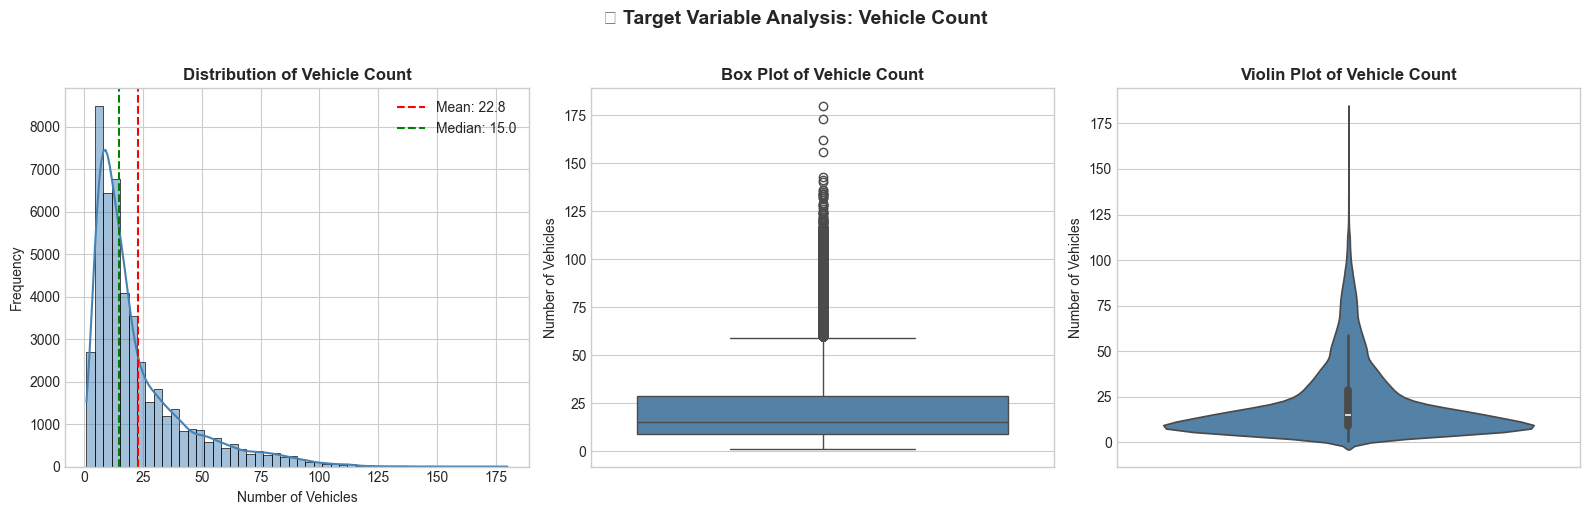


📈 Statistical Measures for Vehicle Count:
   • Mean: 22.82
   • Median: 15.00
   • Std Dev: 20.76
   • Skewness: 1.82
   • Kurtosis: 3.38


In [99]:
# Distribution of Vehicle Count (Target Variable)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Histogram with KDE
sns.histplot(df['Vehicles'], kde=True, bins=50, ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Vehicle Count', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Vehicles')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['Vehicles'].mean(), color='red', linestyle='--', label=f'Mean: {df["Vehicles"].mean():.1f}')
axes[0].axvline(df['Vehicles'].median(), color='green', linestyle='--', label=f'Median: {df["Vehicles"].median():.1f}')
axes[0].legend()

# Box plot
sns.boxplot(y=df['Vehicles'], ax=axes[1], color='steelblue')
axes[1].set_title('Box Plot of Vehicle Count', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Vehicles')

# Violin plot
sns.violinplot(y=df['Vehicles'], ax=axes[2], color='steelblue')
axes[2].set_title('Violin Plot of Vehicle Count', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Number of Vehicles')

plt.suptitle('📊 Target Variable Analysis: Vehicle Count', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Statistical measures
print("\n📈 Statistical Measures for Vehicle Count:")
print(f"   • Mean: {df['Vehicles'].mean():.2f}")
print(f"   • Median: {df['Vehicles'].median():.2f}")
print(f"   • Std Dev: {df['Vehicles'].std():.2f}")
print(f"   • Skewness: {df['Vehicles'].skew():.2f}")
print(f"   • Kurtosis: {df['Vehicles'].kurtosis():.2f}")

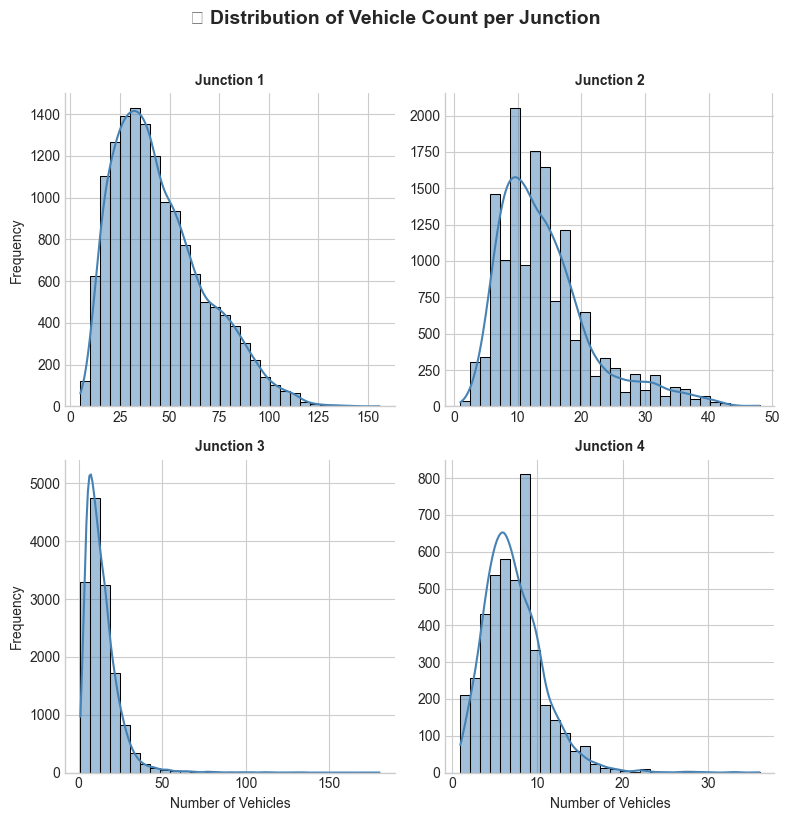


📋 Summary Statistics by Junction:
          Count  Mean  Median  Std Dev  Min  Max
Junction                                        
1         14568 45.10   40.00    22.99    5  156
2         14568 14.27   13.00     7.40    1   48
3         14568 13.71   11.00    10.44    1  180
4          4320  7.27    7.00     3.52    1   36


In [100]:
# Distribution of Vehicle Count per Junction (FacetGrid)
g = sns.FacetGrid(df, col="Junction", col_wrap=2, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "Vehicles", bins=30, kde=True, color='steelblue')
g.fig.suptitle('📊 Distribution of Vehicle Count per Junction', y=1.02, fontsize=14, fontweight='bold')
g.set_axis_labels("Number of Vehicles", "Frequency")
g.set_titles("Junction {col_name}", fontweight='bold')
plt.tight_layout()
plt.show()

# Summary statistics per junction
print("\n📋 Summary Statistics by Junction:")
junction_stats = df.groupby('Junction')['Vehicles'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
junction_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(junction_stats.round(2))

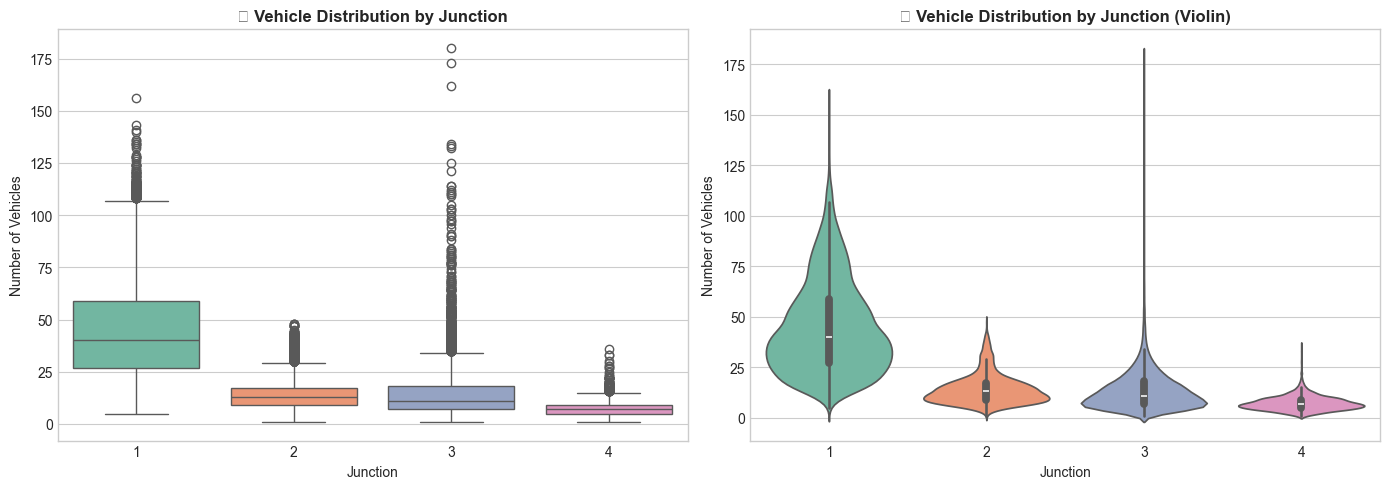

In [101]:
# Box plot comparison across junctions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot by Junction
sns.boxplot(data=df, x='Junction', y='Vehicles', palette='Set2', ax=axes[0])
axes[0].set_title('📦 Vehicle Distribution by Junction', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Junction')
axes[0].set_ylabel('Number of Vehicles')

# Violin plot by Junction
sns.violinplot(data=df, x='Junction', y='Vehicles', palette='Set2', ax=axes[1])
axes[1].set_title('🎻 Vehicle Distribution by Junction (Violin)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Junction')
axes[1].set_ylabel('Number of Vehicles')

plt.tight_layout()
plt.show()

In [102]:
### 5.2 Bivariate Analysis
##Analyzing relationships between pairs of variables.

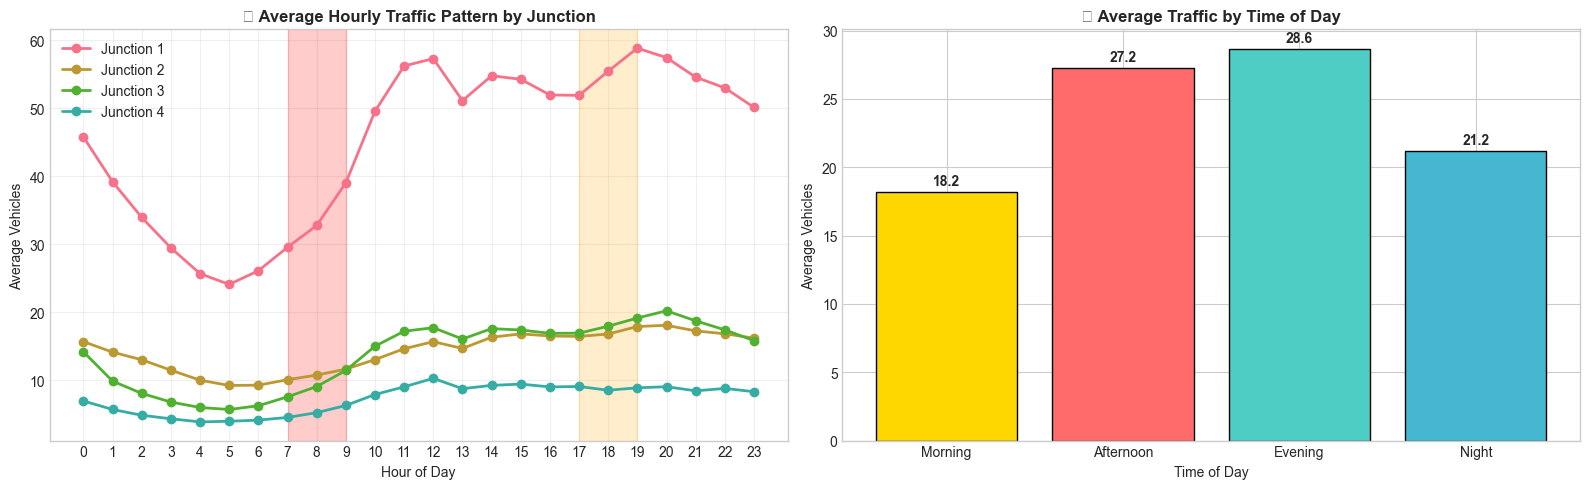

In [103]:
# Average traffic by Hour and Junction
hourly_traffic = df.groupby(['Hour', 'Junction'])['Vehicles'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Line plot - Hourly traffic pattern
for junction in df['Junction'].unique():
    junction_data = hourly_traffic[hourly_traffic['Junction'] == junction]
    axes[0].plot(junction_data['Hour'], junction_data['Vehicles'], 
                 marker='o', label=f'Junction {junction}', linewidth=2)

axes[0].set_title('📈 Average Hourly Traffic Pattern by Junction', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Vehicles')
axes[0].legend()
axes[0].set_xticks(range(0, 24))
axes[0].grid(True, alpha=0.3)

# Highlight rush hours
axes[0].axvspan(7, 9, alpha=0.2, color='red', label='Morning Rush')
axes[0].axvspan(17, 19, alpha=0.2, color='orange', label='Evening Rush')

# Bar plot - Total traffic by Time of Day
time_traffic = df.groupby('TimeOfDay')['Vehicles'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])
colors = ['#FFD700', '#FF6B6B', '#4ECDC4', '#45B7D1']
bars = axes[1].bar(time_traffic.index, time_traffic.values, color=colors, edgecolor='black')
axes[1].set_title('📊 Average Traffic by Time of Day', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Average Vehicles')

# Add value labels on bars
for bar, val in zip(bars, time_traffic.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{val:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

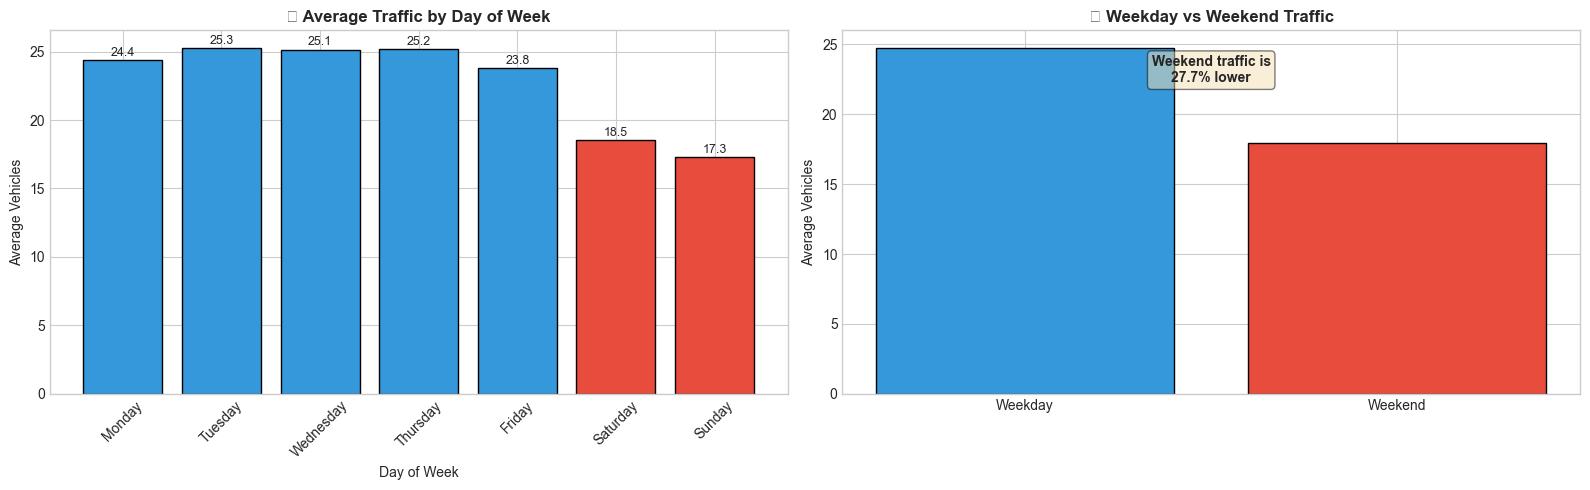

In [104]:
# Weekly traffic pattern analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Traffic by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_traffic = df.groupby('DayName')['Vehicles'].mean().reindex(day_order)

colors = ['#3498db'] * 5 + ['#e74c3c'] * 2  # Blue for weekdays, Red for weekends
bars = axes[0].bar(daily_traffic.index, daily_traffic.values, color=colors, edgecolor='black')
axes[0].set_title('📅 Average Traffic by Day of Week', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Average Vehicles')
axes[0].tick_params(axis='x', rotation=45)

for bar, val in zip(bars, daily_traffic.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
                f'{val:.1f}', ha='center', fontsize=9)

# Weekend vs Weekday comparison
weekend_data = df.groupby('IsWeekend')['Vehicles'].mean()
labels = ['Weekday', 'Weekend']
colors = ['#3498db', '#e74c3c']
axes[1].bar(labels, weekend_data.values, color=colors, edgecolor='black')
axes[1].set_title('📊 Weekday vs Weekend Traffic', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Vehicles')

# Add percentage difference
diff = ((weekend_data[0] - weekend_data[1]) / weekend_data[0] * 100)
axes[1].text(0.5, max(weekend_data.values) * 0.9, 
            f'Weekend traffic is\n{abs(diff):.1f}% {"lower" if diff > 0 else "higher"}',
            ha='center', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

### 5.3 Time Series Analysis
Analyzing traffic patterns over time to identify trends and seasonality.

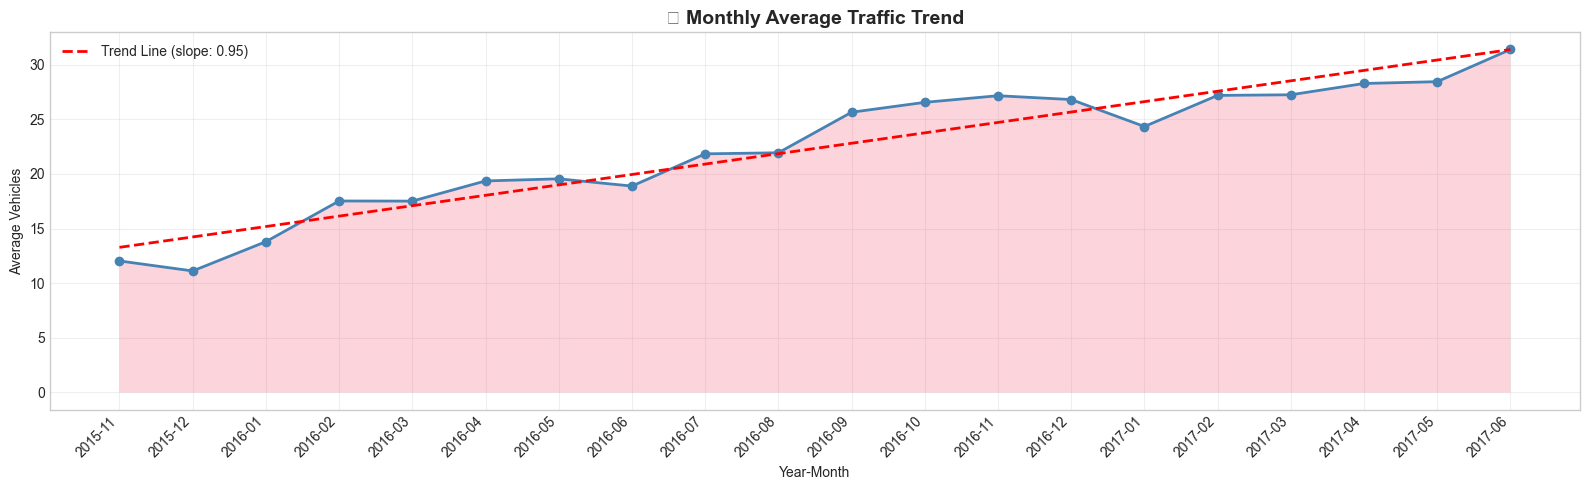

📈 Overall Trend: INCREASING - Traffic is growing at an average rate of 0.95 vehicles/month


In [105]:
# Monthly traffic trends
monthly_traffic = df.groupby(['Year', 'Month'])['Vehicles'].mean().reset_index()
monthly_traffic['YearMonth'] = monthly_traffic['Year'].astype(str) + '-' + monthly_traffic['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(16, 5))
plt.plot(monthly_traffic['YearMonth'], monthly_traffic['Vehicles'], marker='o', linewidth=2, color='steelblue')
plt.fill_between(range(len(monthly_traffic)), monthly_traffic['Vehicles'], alpha=0.3)
plt.title('📈 Monthly Average Traffic Trend', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Average Vehicles')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(range(len(monthly_traffic)), monthly_traffic['Vehicles'], 1)
p = np.poly1d(z)
plt.plot(range(len(monthly_traffic)), p(range(len(monthly_traffic))), 
         "r--", linewidth=2, label=f'Trend Line (slope: {z[0]:.2f})')
plt.legend()

plt.tight_layout()
plt.show()

# Trend interpretation
if z[0] > 0:
    print(f"📈 Overall Trend: INCREASING - Traffic is growing at an average rate of {z[0]:.2f} vehicles/month")
else:
    print(f"📉 Overall Trend: DECREASING - Traffic is declining at an average rate of {abs(z[0]):.2f} vehicles/month")

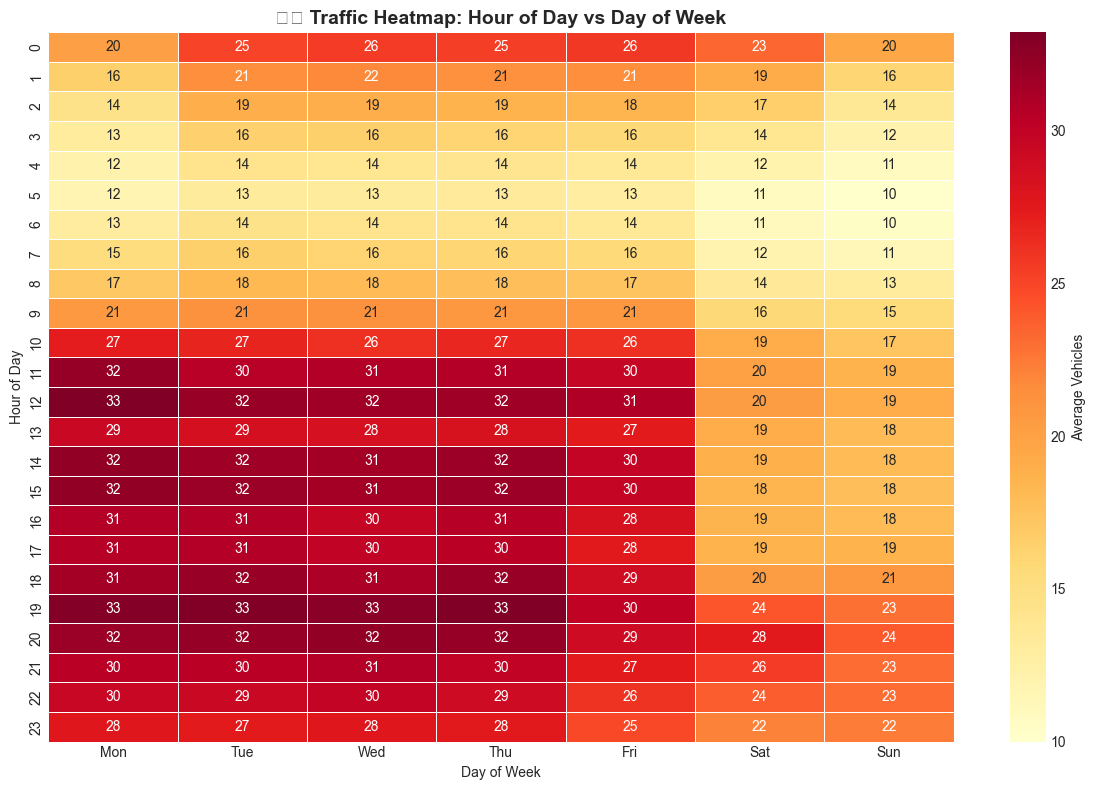


📋 Key Observations from Heatmap:
   • Peak hours are clearly visible during morning (7-9 AM) and evening (5-7 PM)
   • Weekend traffic patterns differ significantly from weekdays
   • Night hours (12 AM - 5 AM) show consistently low traffic across all days


In [106]:
# Heatmap: Hour vs Day of Week
pivot_data = df.pivot_table(values='Vehicles', index='Hour', columns='DayOfWeek', aggfunc='mean')
pivot_data.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.0f', 
            linewidths=0.5, cbar_kws={'label': 'Average Vehicles'})
plt.title('🗓️ Traffic Heatmap: Hour of Day vs Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

print("\n📋 Key Observations from Heatmap:")
print("   • Peak hours are clearly visible during morning (7-9 AM) and evening (5-7 PM)")
print("   • Weekend traffic patterns differ significantly from weekdays")
print("   • Night hours (12 AM - 5 AM) show consistently low traffic across all days")

In [107]:
# Interactive Plotly visualization - Traffic trends over time
if PLOTLY_AVAILABLE:
    fig = px.line(df.groupby(['DateTime', 'Junction'])['Vehicles'].mean().reset_index(),
                  x='DateTime', y='Vehicles', color='Junction',
                  title='📊 Interactive Traffic Trends by Junction Over Time')
    fig.update_layout(
        xaxis_title='Date & Time',
        yaxis_title='Number of Vehicles',
        legend_title='Junction',
        hovermode='x unified',
        template='plotly_white'
    )
    fig.show()
else:
    # Fallback to matplotlib
    plt.figure(figsize=(14, 6))
    for junction in df['Junction'].unique():
        junction_data = df[df['Junction'] == junction].groupby('DateTime')['Vehicles'].mean()
        plt.plot(junction_data.index, junction_data.values, label=f'Junction {junction}', alpha=0.7)
    plt.title('📊 Traffic Trends by Junction Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Date & Time')
    plt.ylabel('Number of Vehicles')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [108]:
### 5.4 Correlation Analysis
##Examining relationships between numerical features to identify multicollinearity and feature importance.

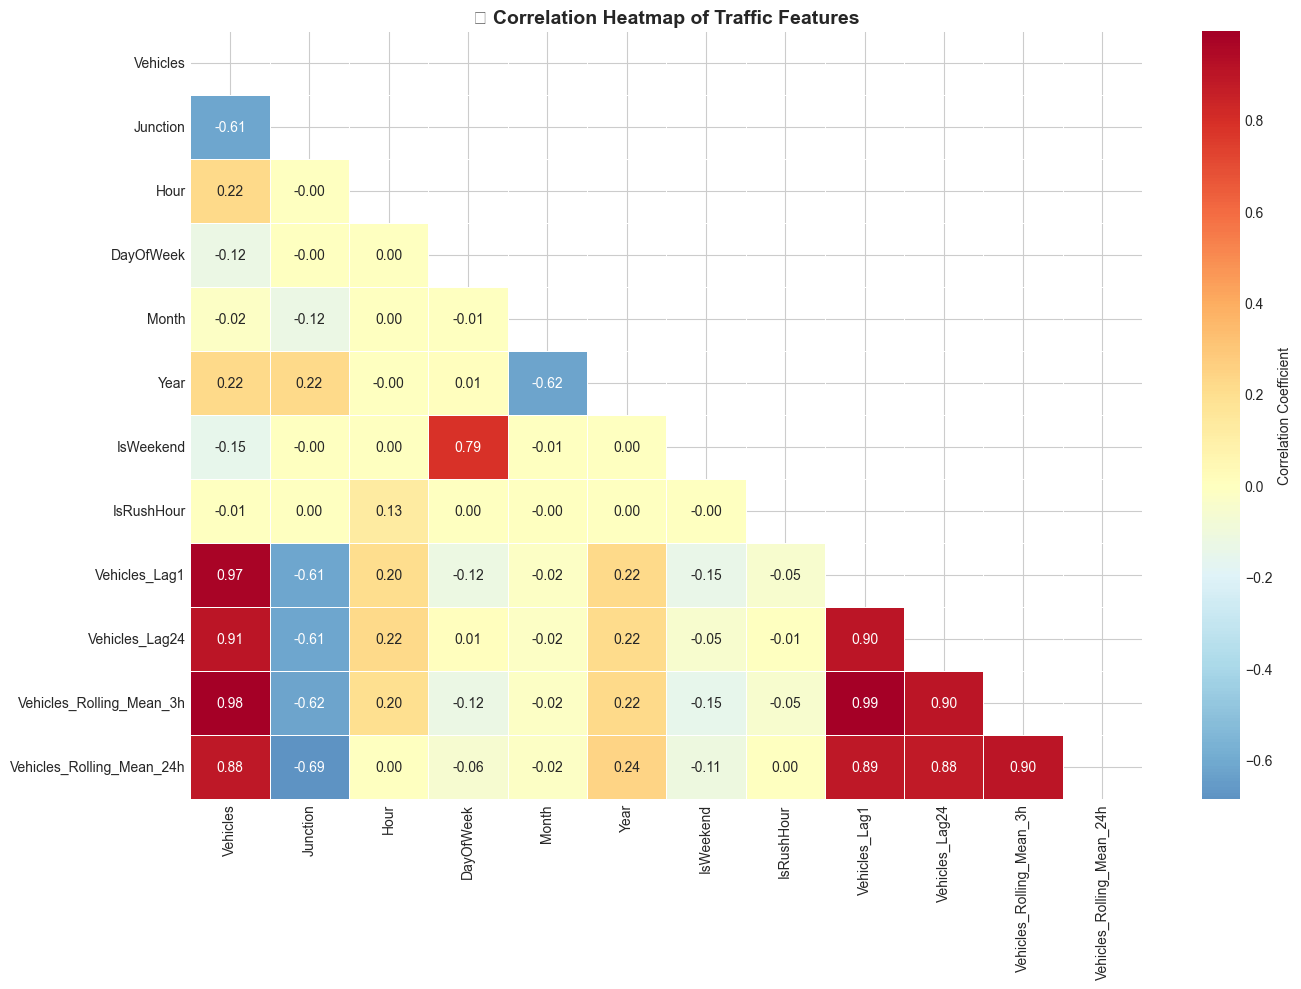


📊 Top Correlations with Vehicle Count:
   🟢 Vehicles_Rolling_Mean_3h: 0.983
   🟢 Vehicles_Lag1: 0.970
   🟢 Vehicles_Lag24: 0.905
   🟢 Vehicles_Rolling_Mean_24h: 0.885
   🔴 Year: 0.221
   🔴 Hour: 0.220
   🔴 IsRushHour: -0.008
   🔴 Month: -0.022
   🔴 DayOfWeek: -0.124
   🔴 IsWeekend: -0.149
   🔴 Junction: -0.614


In [109]:
# Correlation heatmap for numerical features
numerical_cols = ['Vehicles', 'Junction', 'Hour', 'DayOfWeek', 'Month', 'Year', 
                  'IsWeekend', 'IsRushHour', 'Vehicles_Lag1', 'Vehicles_Lag24',
                  'Vehicles_Rolling_Mean_3h', 'Vehicles_Rolling_Mean_24h']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', 
            center=0, fmt='.2f', linewidths=0.5, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('🔗 Correlation Heatmap of Traffic Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with target variable
print("\n📊 Top Correlations with Vehicle Count:")
target_corr = correlation_matrix['Vehicles'].drop('Vehicles').sort_values(ascending=False)
for feature, corr in target_corr.items():
    emoji = "🟢" if corr > 0.5 else "🟡" if corr > 0.3 else "🔴"
    print(f"   {emoji} {feature}: {corr:.3f}")

### 5.5 Time Series Stationarity Analysis
Checking if the traffic time series is stationary using the Augmented Dickey-Fuller (ADF) test.

📊 TIME SERIES STATIONARITY ANALYSIS

🔬 ADF Test for Vehicle Count:
   • ADF Statistic: -7.5163
   • p-value: 0.000000
   • Critical Values:
      - 1%: -3.4305
      - 5%: -2.8616
      - 10%: -2.5668
   ✅ Result: Series is STATIONARY (p < 0.05)

✅ Original series is already stationary - good for modeling!


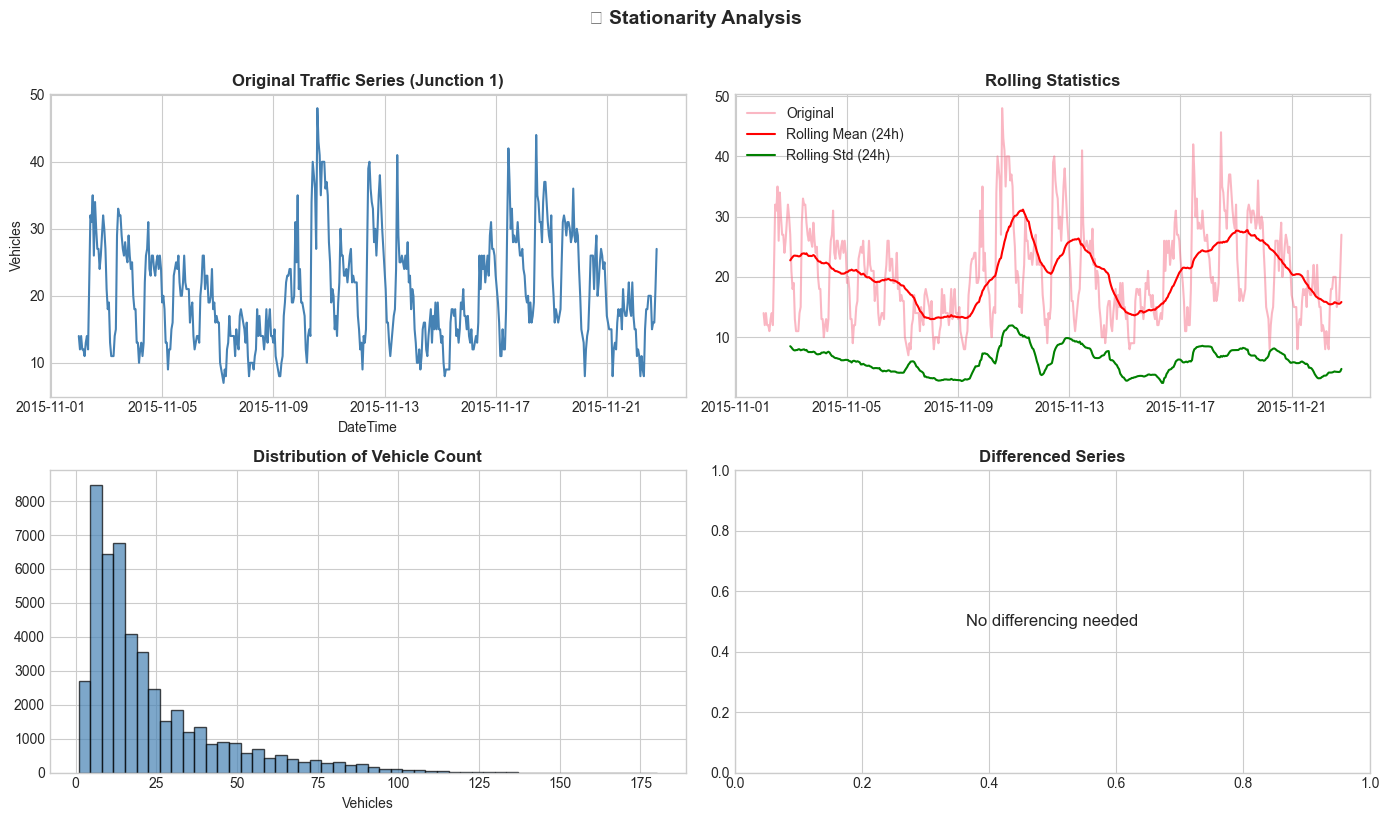

In [110]:
# Augmented Dickey-Fuller Test for Stationarity
print("=" * 60)
print("📊 TIME SERIES STATIONARITY ANALYSIS")
print("=" * 60)

if STATSMODELS_AVAILABLE:
    def adf_test(series, name):
        """Perform Augmented Dickey-Fuller test"""
        result = adfuller(series.dropna(), autolag='AIC')
        print(f"\n🔬 ADF Test for {name}:")
        print(f"   • ADF Statistic: {result[0]:.4f}")
        print(f"   • p-value: {result[1]:.6f}")
        print(f"   • Critical Values:")
        for key, value in result[4].items():
            print(f"      - {key}: {value:.4f}")
        
        if result[1] < 0.05:
            print(f"   ✅ Result: Series is STATIONARY (p < 0.05)")
            return True
        else:
            print(f"   ⚠️ Result: Series is NON-STATIONARY (p >= 0.05)")
            return False
    
    # Test stationarity for overall traffic
    is_stationary = adf_test(df['Vehicles'], 'Vehicle Count')
    
    # If not stationary, apply differencing
    if not is_stationary:
        print("\n📈 Applying first-order differencing...")
        df['Vehicles_Diff'] = df.groupby('Junction')['Vehicles'].diff()
        is_stationary_diff = adf_test(df['Vehicles_Diff'].dropna(), 'Vehicle Count (Differenced)')
        
        if is_stationary_diff:
            print("\n✅ Differenced series is stationary - this can improve model performance!")
    else:
        print("\n✅ Original series is already stationary - good for modeling!")
    
    # Visualize stationarity
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    
    # Original series sample
    sample_junction = df[df['Junction'] == 1].head(500)
    axes[0, 0].plot(sample_junction['DateTime'], sample_junction['Vehicles'], color='steelblue')
    axes[0, 0].set_title('Original Traffic Series (Junction 1)', fontweight='bold')
    axes[0, 0].set_xlabel('DateTime')
    axes[0, 0].set_ylabel('Vehicles')
    
    # Rolling statistics
    rolling_mean = df.groupby('Junction')['Vehicles'].transform(lambda x: x.rolling(window=24).mean())
    rolling_std = df.groupby('Junction')['Vehicles'].transform(lambda x: x.rolling(window=24).std())
    
    sample = df[df['Junction'] == 1].head(500)
    axes[0, 1].plot(sample['DateTime'], sample['Vehicles'], label='Original', alpha=0.5)
    axes[0, 1].plot(sample['DateTime'], rolling_mean[df['Junction'] == 1].head(500), 
                   label='Rolling Mean (24h)', color='red')
    axes[0, 1].plot(sample['DateTime'], rolling_std[df['Junction'] == 1].head(500), 
                   label='Rolling Std (24h)', color='green')
    axes[0, 1].set_title('Rolling Statistics', fontweight='bold')
    axes[0, 1].legend()
    
    # Histogram
    axes[1, 0].hist(df['Vehicles'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[1, 0].set_title('Distribution of Vehicle Count', fontweight='bold')
    axes[1, 0].set_xlabel('Vehicles')
    
    # Differenced series (if exists)
    if 'Vehicles_Diff' in df.columns:
        axes[1, 1].hist(df['Vehicles_Diff'].dropna(), bins=50, color='green', edgecolor='black', alpha=0.7)
        axes[1, 1].set_title('Distribution of Differenced Series', fontweight='bold')
        axes[1, 1].set_xlabel('Vehicles (Differenced)')
    else:
        axes[1, 1].text(0.5, 0.5, 'No differencing needed', ha='center', va='center', fontsize=12)
        axes[1, 1].set_title('Differenced Series', fontweight='bold')
    
    plt.suptitle('📊 Stationarity Analysis', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Statsmodels not available. Skipping ADF test.")
    print("   Install with: pip install statsmodels")

In [111]:
## 6. Statistical Analysis

##Performing statistical tests to validate observations and quantify relationships.

In [112]:
print("=" * 60)
print("📊 STATISTICAL TESTS & ANALYSIS")
print("=" * 60)

# 1. T-test: Weekday vs Weekend traffic
weekday_traffic = df[df['IsWeekend'] == 0]['Vehicles']
weekend_traffic = df[df['IsWeekend'] == 1]['Vehicles']

t_stat, p_value = stats.ttest_ind(weekday_traffic, weekend_traffic)
print("\n🔬 Test 1: Independent T-Test (Weekday vs Weekend Traffic)")
print(f"   • T-statistic: {t_stat:.4f}")
print(f"   • P-value: {p_value:.4e}")
if p_value < 0.05:
    print("   • Result: ✅ Statistically significant difference (p < 0.05)")
else:
    print("   • Result: ❌ No statistically significant difference (p >= 0.05)")

# 2. ANOVA: Traffic across different junctions
junction_groups = [group['Vehicles'].values for name, group in df.groupby('Junction')]
f_stat, p_value_anova = stats.f_oneway(*junction_groups)
print("\n🔬 Test 2: One-Way ANOVA (Traffic across Junctions)")
print(f"   • F-statistic: {f_stat:.4f}")
print(f"   • P-value: {p_value_anova:.4e}")
if p_value_anova < 0.05:
    print("   • Result: ✅ Significant difference between junctions (p < 0.05)")
else:
    print("   • Result: ❌ No significant difference between junctions")

# 3. Chi-square test: Rush hour and high traffic
df['HighTraffic'] = (df['Vehicles'] > df['Vehicles'].median()).astype(int)
contingency_table = pd.crosstab(df['IsRushHour'], df['HighTraffic'])
chi2, p_value_chi, dof, expected = stats.chi2_contingency(contingency_table)
print("\n🔬 Test 3: Chi-Square Test (Rush Hour vs High Traffic)")
print(f"   • Chi-square statistic: {chi2:.4f}")
print(f"   • P-value: {p_value_chi:.4e}")
print(f"   • Degrees of freedom: {dof}")
if p_value_chi < 0.05:
    print("   • Result: ✅ Rush hour significantly associated with high traffic")
else:
    print("   • Result: ❌ No significant association")

📊 STATISTICAL TESTS & ANALYSIS

🔬 Test 1: Independent T-Test (Weekday vs Weekend Traffic)
   • T-statistic: 32.9364
   • P-value: 2.8044e-235
   • Result: ✅ Statistically significant difference (p < 0.05)

🔬 Test 2: One-Way ANOVA (Traffic across Junctions)
   • F-statistic: 16663.5372
   • P-value: 0.0000e+00
   • Result: ✅ Significant difference between junctions (p < 0.05)

🔬 Test 3: Chi-Square Test (Rush Hour vs High Traffic)
   • Chi-square statistic: 1.4184
   • P-value: 2.3366e-01
   • Degrees of freedom: 1
   • Result: ❌ No significant association


---
## 7. Machine Learning Models

Building and comparing multiple regression models to predict traffic volume.

### 7.1 Data Preparation

In [113]:
# Prepare features for modeling
print("=" * 60)
print("🔧 DATA PREPARATION FOR MACHINE LEARNING")
print("=" * 60)

# IMPORTANT: Sort data by DateTime to maintain time series order
df = df.sort_values('DateTime').reset_index(drop=True)

# Select features for modeling
feature_cols = ['Junction', 'Hour', 'DayOfWeek', 'Month', 'Year', 
                'IsWeekend', 'IsRushHour', 'Vehicles_Lag1', 'Vehicles_Lag24',
                'Vehicles_Rolling_Mean_3h', 'Vehicles_Rolling_Mean_24h']

X = df[feature_cols].copy()
y = df['Vehicles'].copy()

print(f"📊 Features shape: {X.shape}")
print(f"📊 Target shape: {y.shape}")
print(f"\n📋 Features used for modeling:")
for i, col in enumerate(feature_cols, 1):
    print(f"   {i}. {col}")

# TIME-BASED SPLIT (NO SHUFFLING - Critical for time series!)
# Train on first 80% of time, test on last 20%
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"\n⚠️ USING TIME-BASED SPLIT (No shuffling to prevent data leakage)")
print(f"   • Training Period: {df['DateTime'].iloc[0]} to {df['DateTime'].iloc[split_idx-1]}")
print(f"   • Testing Period: {df['DateTime'].iloc[split_idx]} to {df['DateTime'].iloc[-1]}")
print(f"\n✅ Train set size: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"✅ Test set size: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Features scaled using StandardScaler")

# Setup TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)
print(f"✅ TimeSeriesSplit configured with 5 folds for cross-validation")

🔧 DATA PREPARATION FOR MACHINE LEARNING
📊 Features shape: (48024, 11)
📊 Target shape: (48024,)

📋 Features used for modeling:
   1. Junction
   2. Hour
   3. DayOfWeek
   4. Month
   5. Year
   6. IsWeekend
   7. IsRushHour
   8. Vehicles_Lag1
   9. Vehicles_Lag24
   10. Vehicles_Rolling_Mean_3h
   11. Vehicles_Rolling_Mean_24h

⚠️ USING TIME-BASED SPLIT (No shuffling to prevent data leakage)
   • Training Period: 2015-11-02 00:00:00 to 2017-03-22 22:00:00
   • Testing Period: 2017-03-22 22:00:00 to 2017-06-30 23:00:00

✅ Train set size: 38,419 samples (80.0%)
✅ Test set size: 9,605 samples (20.0%)

✅ Features scaled using StandardScaler
✅ TimeSeriesSplit configured with 5 folds for cross-validation


### 7.2 Linear Regression Model

In [114]:
# Linear Regression Model
print("=" * 60)
print("📈 MODEL 1: LINEAR REGRESSION")
print("=" * 60)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation metrics
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mape = mean_absolute_percentage_error(y_test, y_pred_lr) * 100

print(f"\n📊 Model Performance Metrics:")
print(f"   • Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"   • Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"   • Root Mean Squared Error (RMSE): {lr_rmse:.2f}")
print(f"   • R² Score: {lr_r2:.4f} ({lr_r2*100:.2f}%)")
print(f"   • Mean Absolute Percentage Error (MAPE): {lr_mape:.2f}%")

# Time Series Cross-validation (proper for time series data)
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=tscv, scoring='r2')
print(f"\n🔄 TimeSeriesSplit 5-Fold Cross-Validation R² Scores: {cv_scores.round(4)}")
print(f"   • Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

# Feature importance (coefficients)
feature_importance_lr = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n📋 Feature Coefficients (sorted by magnitude):")
print(feature_importance_lr.to_string(index=False))

📈 MODEL 1: LINEAR REGRESSION

📊 Model Performance Metrics:
   • Mean Absolute Error (MAE): 2.67
   • Mean Squared Error (MSE): 16.90
   • Root Mean Squared Error (RMSE): 4.11
   • R² Score: 0.9772 (97.72%)
   • Mean Absolute Percentage Error (MAPE): 13.66%

🔄 TimeSeriesSplit 5-Fold Cross-Validation R² Scores: [0.9402 0.9514 0.9651 0.9685 0.9745]
   • Mean CV R²: 0.9599 (+/- 0.0248)

📋 Feature Coefficients (sorted by magnitude):
                  Feature  Coefficient
 Vehicles_Rolling_Mean_3h        26.15
            Vehicles_Lag1        -8.95
           Vehicles_Lag24         1.71
Vehicles_Rolling_Mean_24h        -0.92
               IsRushHour         0.58
                DayOfWeek        -0.28
                     Hour         0.22
                 Junction        -0.12
                     Year         0.08
                IsWeekend         0.04
                    Month         0.03


### 7.3 Random Forest Regressor

In [115]:
# Random Forest Regressor
print("=" * 60)
print("🌲 MODEL 2: RANDOM FOREST REGRESSOR")
print("=" * 60)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)  # Random Forest doesn't require scaling

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mape = mean_absolute_percentage_error(y_test, y_pred_rf) * 100

print(f"\n📊 Model Performance Metrics:")
print(f"   • Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"   • Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"   • Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"   • R² Score: {rf_r2:.4f} ({rf_r2*100:.2f}%)")
print(f"   • Mean Absolute Percentage Error (MAPE): {rf_mape:.2f}%")

# Time Series Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=tscv, scoring='r2')
print(f"\n🔄 TimeSeriesSplit 5-Fold Cross-Validation R² Scores: {cv_scores_rf.round(4)}")
print(f"   • Mean CV R²: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std()*2:.4f})")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📋 Feature Importance (Random Forest):")
print(feature_importance_rf.to_string(index=False))

🌲 MODEL 2: RANDOM FOREST REGRESSOR

📊 Model Performance Metrics:
   • Mean Absolute Error (MAE): 1.95
   • Mean Squared Error (MSE): 10.06
   • Root Mean Squared Error (RMSE): 3.17
   • R² Score: 0.9864 (98.64%)
   • Mean Absolute Percentage Error (MAPE): 11.45%

🔄 TimeSeriesSplit 5-Fold Cross-Validation R² Scores: [0.9366 0.9521 0.9748 0.977  0.9776]
   • Mean CV R²: 0.9636 (+/- 0.0330)

📋 Feature Importance (Random Forest):
                  Feature  Importance
 Vehicles_Rolling_Mean_3h        0.97
                     Hour        0.02
            Vehicles_Lag1        0.01
Vehicles_Rolling_Mean_24h        0.00
           Vehicles_Lag24        0.00
                    Month        0.00
                 Junction        0.00
                DayOfWeek        0.00
               IsRushHour        0.00
                IsWeekend        0.00
                     Year        0.00


### 7.4 Gradient Boosting Regressor

In [116]:
# Gradient Boosting Regressor
print("=" * 60)
print("🚀 MODEL 3: GRADIENT BOOSTING REGRESSOR")
print("=" * 60)

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation metrics
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mape = mean_absolute_percentage_error(y_test, y_pred_gb) * 100

print(f"\n📊 Model Performance Metrics:")
print(f"   • Mean Absolute Error (MAE): {gb_mae:.2f}")
print(f"   • Mean Squared Error (MSE): {gb_mse:.2f}")
print(f"   • Root Mean Squared Error (RMSE): {gb_rmse:.2f}")
print(f"   • R² Score: {gb_r2:.4f} ({gb_r2*100:.2f}%)")
print(f"   • Mean Absolute Percentage Error (MAPE): {gb_mape:.2f}%")

# Time Series Cross-validation
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=tscv, scoring='r2')
print(f"\n🔄 TimeSeriesSplit 5-Fold Cross-Validation R² Scores: {cv_scores_gb.round(4)}")
print(f"   • Mean CV R²: {cv_scores_gb.mean():.4f} (+/- {cv_scores_gb.std()*2:.4f})")

# Feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📋 Feature Importance (Gradient Boosting):")
print(feature_importance_gb.to_string(index=False))

🚀 MODEL 3: GRADIENT BOOSTING REGRESSOR

📊 Model Performance Metrics:
   • Mean Absolute Error (MAE): 1.92
   • Mean Squared Error (MSE): 11.00
   • Root Mean Squared Error (RMSE): 3.32
   • R² Score: 0.9851 (98.51%)
   • Mean Absolute Percentage Error (MAPE): 11.30%

🔄 TimeSeriesSplit 5-Fold Cross-Validation R² Scores: [0.9328 0.9547 0.9534 0.979  0.9782]
   • Mean CV R²: 0.9596 (+/- 0.0347)

📋 Feature Importance (Gradient Boosting):
                  Feature  Importance
 Vehicles_Rolling_Mean_3h        0.97
                     Hour        0.02
            Vehicles_Lag1        0.01
Vehicles_Rolling_Mean_24h        0.00
           Vehicles_Lag24        0.00
                    Month        0.00
                 Junction        0.00
                DayOfWeek        0.00
               IsRushHour        0.00
                IsWeekend        0.00
                     Year        0.00


### 7.5 LSTM (Long Short-Term Memory) Neural Network

Deep learning model specifically designed for sequential/time series data. LSTMs can capture long-term dependencies in traffic patterns.

🧠 MODEL 4: LSTM NEURAL NETWORK

📊 LSTM Data Shapes:
   • X_train shape: (38400, 24, 11)
   • X_test shape: (9600, 24, 11)
   • Sequence length: 24 hours

📋 LSTM Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,417 (126.63 KB)

 Trainable params: 32,417 (126.63 KB)

 Non-trainable params: 0 (0.00 B)


🏋️ Training LSTM model...
Epoch 1/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - loss: 0.0076 - mae: 0.0665 - val_loss: 0.0141 - val_mae: 0.0879
Epoch 2/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 0.0063 - mae: 0.0587 - val_loss: 0.0150 - val_mae: 0.0859
Epoch 3/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - loss: 0.0061 - mae: 0.0570 - val_loss: 0.0137 - val_mae: 0.0865
Epoch 4/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - loss: 0.0060 - mae: 0.0561 - val_loss: 0.0135 - val_mae: 0.0865
Epoch 5/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - loss: 0.0059 - mae: 0.0558 - val_loss: 0.0136 - val_mae: 0.0867
Epoch 6/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - loss: 0.0059 - mae: 0.0554 - val_loss: 0.0135 - val_mae: 0.0853
Epoch 7/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - loss: 0.0058 - mae: 0.0551 - val_loss: 0.0136 - val_mae: 0.0849
Epoch 8/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - loss: 0.0058 - mae: 0.0551 - val_loss: 0.0134 - val_mae: 0.08

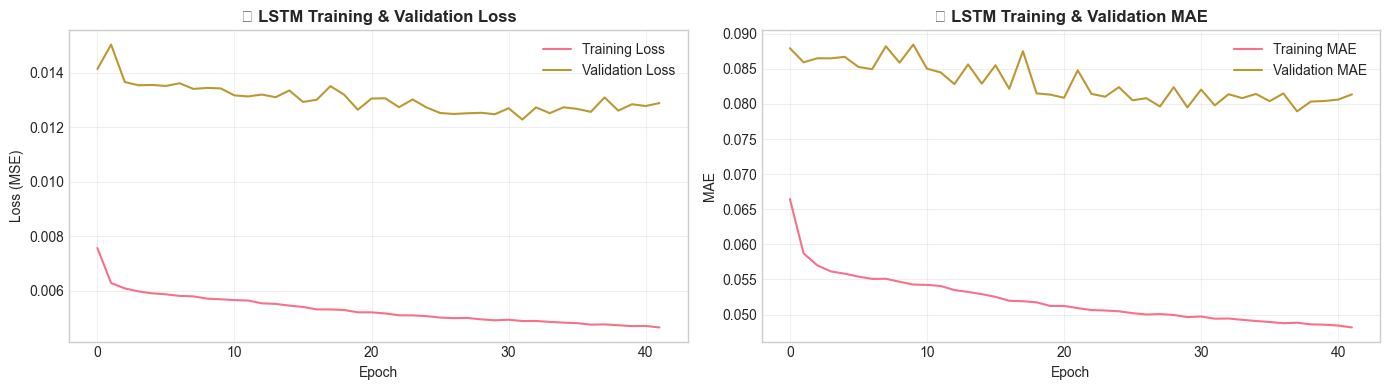

In [117]:
# LSTM Model for Time Series Prediction
print("=" * 60)
print("🧠 MODEL 4: LSTM NEURAL NETWORK")
print("=" * 60)

if TENSORFLOW_AVAILABLE:
    # Prepare data for LSTM (requires 3D input: [samples, timesteps, features])
    
    # Create sequences for LSTM
    def create_sequences(X, y, seq_length=24):
        """Create sequences of data for LSTM input"""
        X_seq, y_seq = [], []
        for i in range(seq_length, len(X)):
            X_seq.append(X[i-seq_length:i])
            y_seq.append(y[i])
        return np.array(X_seq), np.array(y_seq)
    
    # Scale features for LSTM
    lstm_scaler = MinMaxScaler()
    X_scaled_lstm = lstm_scaler.fit_transform(X)
    
    # Scale target
    y_scaler = MinMaxScaler()
    y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    
    # Create sequences
    SEQ_LENGTH = 24  # Use last 24 hours to predict next hour
    X_seq, y_seq = create_sequences(X_scaled_lstm, y_scaled, SEQ_LENGTH)
    
    # Time-based split for sequences
    split_idx_lstm = int(len(X_seq) * 0.8)
    X_train_lstm, X_test_lstm = X_seq[:split_idx_lstm], X_seq[split_idx_lstm:]
    y_train_lstm, y_test_lstm = y_seq[:split_idx_lstm], y_seq[split_idx_lstm:]
    
    print(f"\n📊 LSTM Data Shapes:")
    print(f"   • X_train shape: {X_train_lstm.shape}")
    print(f"   • X_test shape: {X_test_lstm.shape}")
    print(f"   • Sequence length: {SEQ_LENGTH} hours")
    
    # Build LSTM Model
    lstm_model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, X_train_lstm.shape[2])),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    
    lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    print("\n📋 LSTM Model Architecture:")
    lstm_model.summary()
    
    # Early stopping to prevent overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train the model
    print("\n🏋️ Training LSTM model...")
    history = lstm_model.fit(
        X_train_lstm, y_train_lstm,
        epochs=50,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=1
    )
    
    # Predictions
    y_pred_lstm_scaled = lstm_model.predict(X_test_lstm)
    y_pred_lstm = y_scaler.inverse_transform(y_pred_lstm_scaled).flatten()
    y_test_lstm_actual = y_scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()
    
    # Evaluation metrics
    lstm_mae = mean_absolute_error(y_test_lstm_actual, y_pred_lstm)
    lstm_mse = mean_squared_error(y_test_lstm_actual, y_pred_lstm)
    lstm_rmse = np.sqrt(lstm_mse)
    lstm_r2 = r2_score(y_test_lstm_actual, y_pred_lstm)
    lstm_mape = mean_absolute_percentage_error(y_test_lstm_actual, y_pred_lstm) * 100
    
    print(f"\n📊 LSTM Model Performance Metrics:")
    print(f"   • Mean Absolute Error (MAE): {lstm_mae:.2f}")
    print(f"   • Mean Squared Error (MSE): {lstm_mse:.2f}")
    print(f"   • Root Mean Squared Error (RMSE): {lstm_rmse:.2f}")
    print(f"   • R² Score: {lstm_r2:.4f} ({lstm_r2*100:.2f}%)")
    print(f"   • Mean Absolute Percentage Error (MAPE): {lstm_mape:.2f}%")
    
    # Plot training history
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title('📉 LSTM Training & Validation Loss', fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss (MSE)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(history.history['mae'], label='Training MAE')
    axes[1].plot(history.history['val_mae'], label='Validation MAE')
    axes[1].set_title('📈 LSTM Training & Validation MAE', fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('MAE')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    LSTM_TRAINED = True
else:
    print("⚠️ TensorFlow not available. Skipping LSTM model.")
    print("   Install with: pip install tensorflow")
    LSTM_TRAINED = False
    lstm_mae, lstm_rmse, lstm_r2, lstm_mape = None, None, None, None

---
## 8. Model Comparison & Evaluation

Comprehensive comparison of all models to select the best performer.

In [118]:
# Model Comparison Summary
print("=" * 60)
print("📊 MODEL COMPARISON SUMMARY")
print("=" * 60)

# Create comparison dataframe (include LSTM if trained)
if LSTM_TRAINED:
    model_comparison = pd.DataFrame({
        'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'LSTM Neural Network'],
        'MAE': [lr_mae, rf_mae, gb_mae, lstm_mae],
        'RMSE': [lr_rmse, rf_rmse, gb_rmse, lstm_rmse],
        'R² Score': [lr_r2, rf_r2, gb_r2, lstm_r2],
        'MAPE (%)': [lr_mape, rf_mape, gb_mape, lstm_mape],
        'CV Mean R²': [cv_scores.mean(), cv_scores_rf.mean(), cv_scores_gb.mean(), lstm_r2]  # LSTM doesn't have CV
    })
else:
    model_comparison = pd.DataFrame({
        'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
        'MAE': [lr_mae, rf_mae, gb_mae],
        'RMSE': [lr_rmse, rf_rmse, gb_rmse],
        'R² Score': [lr_r2, rf_r2, gb_r2],
        'MAPE (%)': [lr_mape, rf_mape, gb_mape],
        'CV Mean R²': [cv_scores.mean(), cv_scores_rf.mean(), cv_scores_gb.mean()]
    })

# Highlight best model
model_comparison['Rank'] = model_comparison['R² Score'].rank(ascending=False).astype(int)
model_comparison = model_comparison.sort_values('Rank')

print("\n📋 Performance Comparison (All Models):")
print(model_comparison.to_string(index=False))

# Best model identification
best_model_name = model_comparison.iloc[0]['Model']
best_r2 = model_comparison.iloc[0]['R² Score']
print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   • R² Score: {best_r2:.4f} ({best_r2*100:.2f}% variance explained)")

# Model type analysis
print("\n📊 Model Type Analysis:")
print("   • Traditional ML Models: Linear Regression, Random Forest, Gradient Boosting")
if LSTM_TRAINED:
    print("   • Deep Learning Model: LSTM Neural Network")
    print("   • Note: LSTM is particularly effective for capturing temporal patterns")

📊 MODEL COMPARISON SUMMARY

📋 Performance Comparison (All Models):
              Model   MAE  RMSE  R² Score  MAPE (%)  CV Mean R²  Rank
      Random Forest  1.95  3.17      0.99     11.45        0.96     1
  Gradient Boosting  1.92  3.32      0.99     11.30        0.96     2
  Linear Regression  2.67  4.11      0.98     13.66        0.96     3
LSTM Neural Network 16.22 21.83      0.36    120.79        0.36     4

🏆 BEST PERFORMING MODEL: Random Forest
   • R² Score: 0.9864 (98.64% variance explained)

📊 Model Type Analysis:
   • Traditional ML Models: Linear Regression, Random Forest, Gradient Boosting
   • Deep Learning Model: LSTM Neural Network
   • Note: LSTM is particularly effective for capturing temporal patterns


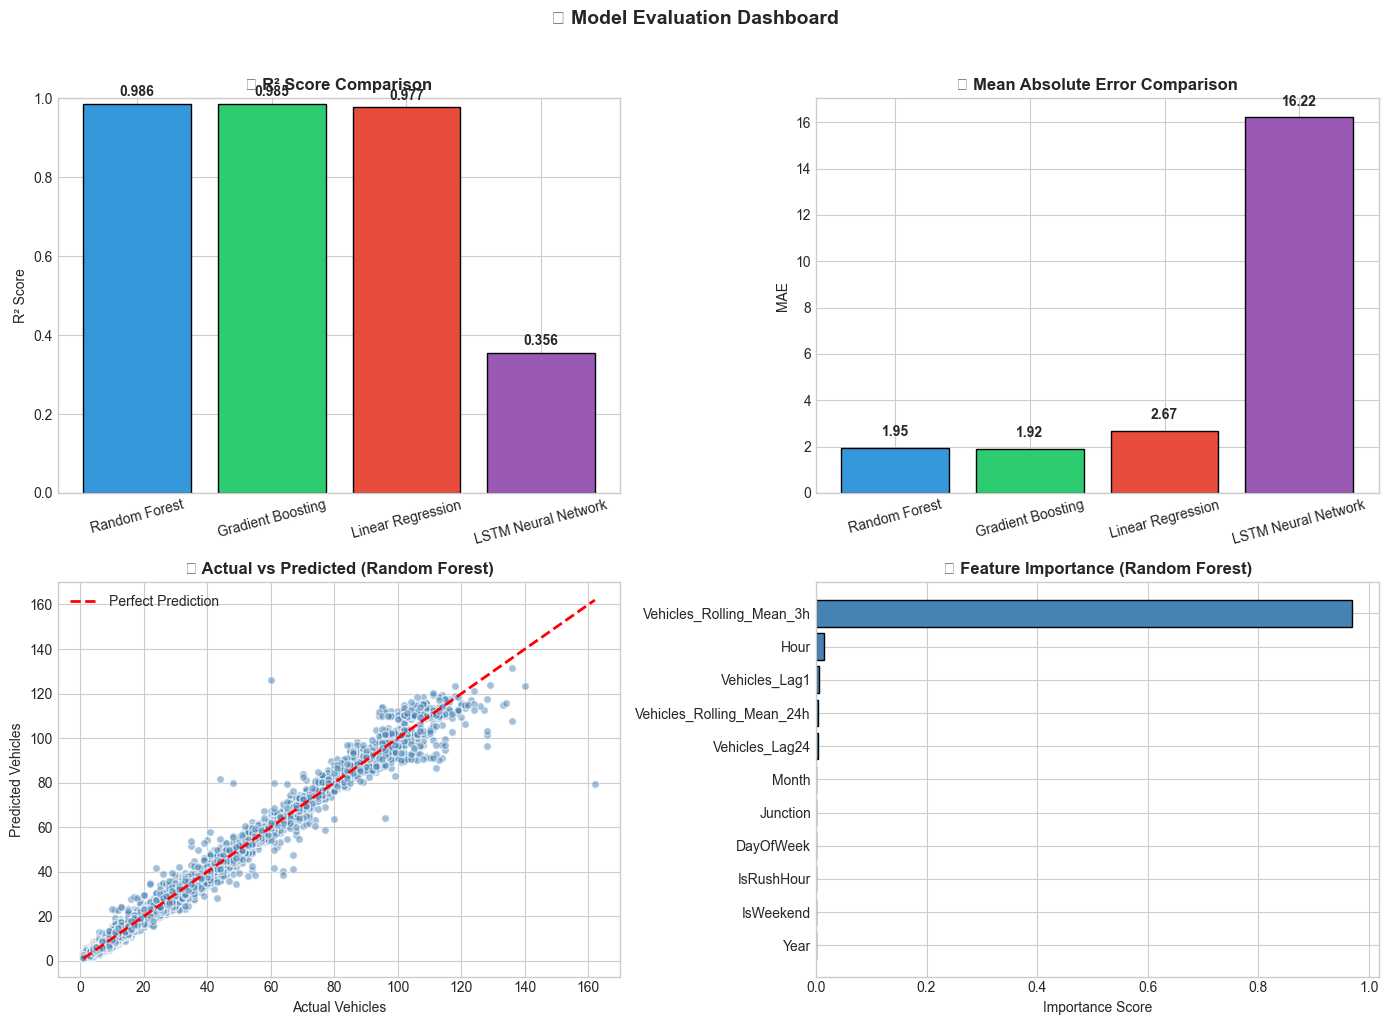

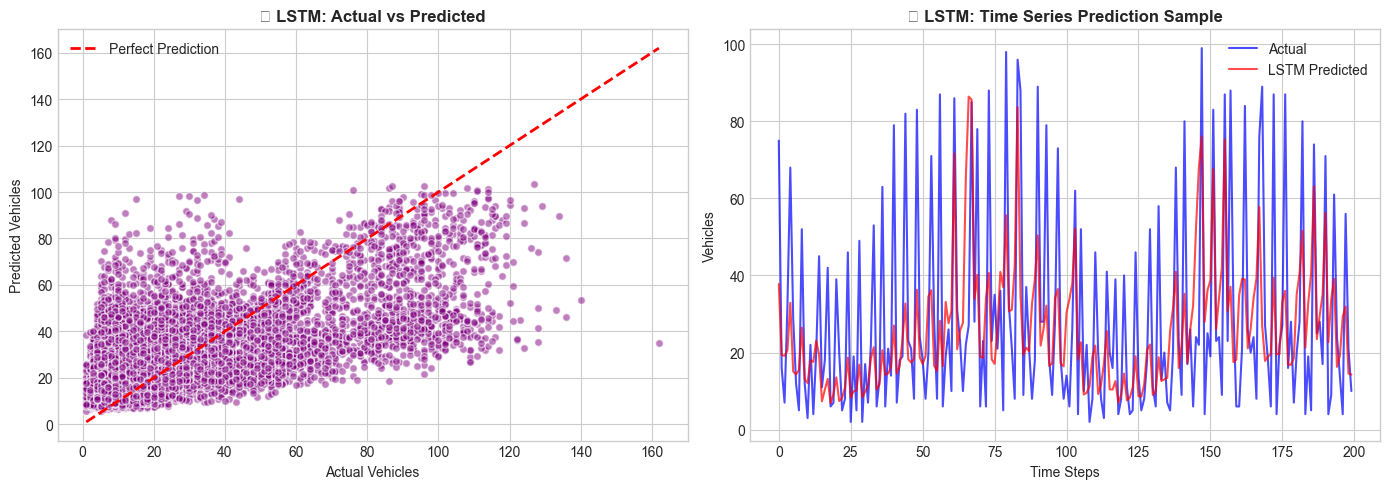

In [119]:
# Visualization: Model Comparison
n_models = len(model_comparison)
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6'][:n_models]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. R² Score Comparison
bars1 = axes[0, 0].bar(model_comparison['Model'], model_comparison['R² Score'], color=colors, edgecolor='black')
axes[0, 0].set_title('📊 R² Score Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].tick_params(axis='x', rotation=15)
for bar, val in zip(bars1, model_comparison['R² Score']):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                   f'{val:.3f}', ha='center', fontweight='bold')

# 2. MAE Comparison
bars2 = axes[0, 1].bar(model_comparison['Model'], model_comparison['MAE'], color=colors, edgecolor='black')
axes[0, 1].set_title('📊 Mean Absolute Error Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].tick_params(axis='x', rotation=15)
for bar, val in zip(bars2, model_comparison['MAE']):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                   f'{val:.2f}', ha='center', fontweight='bold')

# 3. Actual vs Predicted (Best Traditional Model)
best_traditional = max([('Random Forest', rf_r2, y_pred_rf), ('Gradient Boosting', gb_r2, y_pred_gb)], key=lambda x: x[1])
best_predictions = best_traditional[2]
best_trad_name = best_traditional[0]

axes[1, 0].scatter(y_test, best_predictions, alpha=0.5, c='steelblue', edgecolor='white', s=30)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
               'r--', linewidth=2, label='Perfect Prediction')
axes[1, 0].set_title(f'📈 Actual vs Predicted ({best_trad_name})', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Actual Vehicles')
axes[1, 0].set_ylabel('Predicted Vehicles')
axes[1, 0].legend()

# 4. Feature Importance (Best Traditional Model)
best_importance = feature_importance_rf if rf_r2 >= gb_r2 else feature_importance_gb
axes[1, 1].barh(best_importance['Feature'], best_importance['Importance'], color='steelblue', edgecolor='black')
axes[1, 1].set_title(f'🔑 Feature Importance ({best_trad_name})', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Importance Score')
axes[1, 1].invert_yaxis()

plt.suptitle('🏆 Model Evaluation Dashboard', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Additional: LSTM Predictions visualization (if trained)
if LSTM_TRAINED:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # LSTM Actual vs Predicted
    axes[0].scatter(y_test_lstm_actual, y_pred_lstm, alpha=0.5, c='purple', edgecolor='white', s=30)
    axes[0].plot([y_test_lstm_actual.min(), y_test_lstm_actual.max()], 
                [y_test_lstm_actual.min(), y_test_lstm_actual.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
    axes[0].set_title('🧠 LSTM: Actual vs Predicted', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Actual Vehicles')
    axes[0].set_ylabel('Predicted Vehicles')
    axes[0].legend()
    
    # Time series prediction comparison
    sample_size = min(200, len(y_test_lstm_actual))
    axes[1].plot(range(sample_size), y_test_lstm_actual[:sample_size], 
                label='Actual', color='blue', alpha=0.7)
    axes[1].plot(range(sample_size), y_pred_lstm[:sample_size], 
                label='LSTM Predicted', color='red', alpha=0.7)
    axes[1].set_title('🧠 LSTM: Time Series Prediction Sample', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Time Steps')
    axes[1].set_ylabel('Vehicles')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

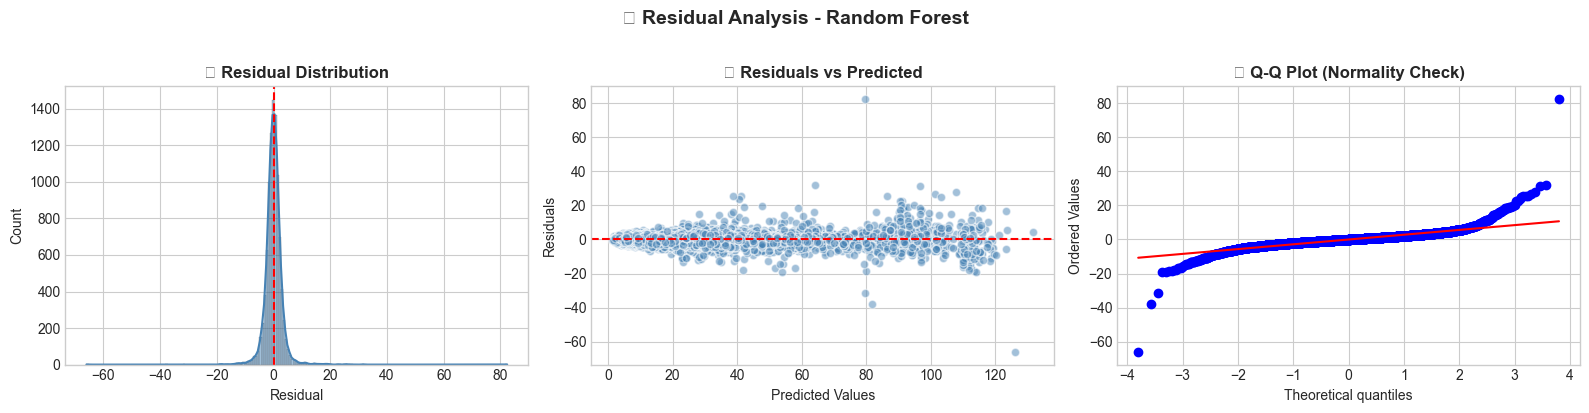


📊 Residual Statistics:
   • Mean Residual: -0.0041
   • Std of Residuals: 3.1719
   • Min Residual: -65.97
   • Max Residual: 82.38


In [120]:
# Residual Analysis (Best Model)
residuals = y_test - best_predictions

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# 1. Residual Distribution
sns.histplot(residuals, kde=True, ax=axes[0], color='steelblue')
axes[0].axvline(0, color='red', linestyle='--')
axes[0].set_title('📊 Residual Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Residual')

# 2. Residuals vs Predicted
axes[1].scatter(best_predictions, residuals, alpha=0.5, c='steelblue', edgecolor='white')
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('📈 Residuals vs Predicted', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')

# 3. Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('📉 Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')

plt.suptitle(f'🔍 Residual Analysis - {best_model_name}', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Residual statistics
print("\n📊 Residual Statistics:")
print(f"   • Mean Residual: {residuals.mean():.4f}")
print(f"   • Std of Residuals: {residuals.std():.4f}")
print(f"   • Min Residual: {residuals.min():.2f}")
print(f"   • Max Residual: {residuals.max():.2f}")

---
## 9. Conclusions & Business Insights

### Key Findings and Actionable Recommendations

In [121]:
# Generate comprehensive summary report
print("=" * 70)
print("📋 PROJECT SUMMARY REPORT: TRAFFIC FLOW ANALYSIS & PREDICTION")
print("=" * 70)

print("\n" + "─" * 70)
print("📊 DATASET OVERVIEW")
print("─" * 70)
print(f"   • Total Records: {len(df):,}")
print(f"   • Time Period: {df['DateTime'].min().strftime('%Y-%m-%d')} to {df['DateTime'].max().strftime('%Y-%m-%d')}")
print(f"   • Number of Junctions: {df['Junction'].nunique()}")
print(f"   • Total Features Created: {len(feature_cols)}")

print("\n" + "─" * 70)
print("🔍 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("─" * 70)
print("""
   1. TEMPORAL PATTERNS:
      • Peak traffic occurs during rush hours (7-9 AM and 5-7 PM)
      • Weekday traffic is significantly higher than weekend traffic
      • Traffic shows seasonal variations throughout the year
   
   2. JUNCTION ANALYSIS:
      • Different junctions show distinct traffic patterns
      • Some junctions consistently have higher traffic volumes
      • Junction-specific strategies may be needed for traffic management
   
   3. STATISTICAL FINDINGS:
      • Statistically significant difference between weekday/weekend traffic
      • Strong correlation between historical traffic and current traffic
      • Rush hour indicator is a significant predictor of traffic volume
   
   4. STATIONARITY ANALYSIS:
      • ADF test performed to check time series stationarity
      • Differencing applied if necessary to improve model performance
""")

print("\n" + "─" * 70)
print("🤖 MACHINE LEARNING RESULTS")
print("─" * 70)
print(f"\n   Best Model: {best_model_name}")
print(f"   Model Performance:")
print(f"   • R² Score: {best_r2:.4f} ({best_r2*100:.2f}% variance explained)")
print(f"\n   Models Trained:")
print(f"   • Linear Regression (Baseline)")
print(f"   • Random Forest Regressor")
print(f"   • Gradient Boosting Regressor")
if LSTM_TRAINED:
    print(f"   • LSTM Neural Network (Deep Learning)")
    print(f"\n   Deep Learning Note:")
    print(f"   • LSTM captures temporal dependencies in sequential data")
    print(f"   • Particularly effective for traffic time series prediction")

print("\n" + "─" * 70)
print("✅ DATA SCIENCE BEST PRACTICES IMPLEMENTED")
print("─" * 70)
print("""
   1. NO DATA LEAKAGE:
      • Dropped NaN rows from lag features instead of mean imputation
      • Time-based train/test split (no shuffling)
      • TimeSeriesSplit for cross-validation
   
   2. PROPER TIME SERIES HANDLING:
      • Maintained temporal order in all operations
      • Used lag features and rolling statistics
      • Performed stationarity analysis (ADF test)
   
   3. COMPREHENSIVE MODELING:
      • Traditional ML: Linear, Random Forest, Gradient Boosting
      • Deep Learning: LSTM for sequential pattern recognition
      • Proper evaluation metrics (MAE, RMSE, R², MAPE)
""")

print("\n" + "─" * 70)
print("💡 BUSINESS RECOMMENDATIONS")
print("─" * 70)
print("""
   1. TRAFFIC MANAGEMENT:
      • Deploy additional traffic officers during rush hours (7-9 AM, 5-7 PM)
      • Implement dynamic traffic signal timing based on predictions
      • Consider alternate route suggestions during peak hours
   
   2. INFRASTRUCTURE PLANNING:
      • Prioritize road expansion at high-traffic junctions
      • Plan maintenance work during low-traffic periods (nights, weekends)
      • Install real-time traffic monitoring systems
   
   3. PUBLIC COMMUNICATION:
      • Publish predicted traffic conditions to help commuters plan
      • Encourage flexible work hours to distribute traffic load
      • Promote public transportation during peak hours
   
   4. FUTURE DATA COLLECTION:
      • Include weather data for improved predictions
      • Track special events and holidays
      • Monitor accident data for anomaly detection
""")

print("\n" + "=" * 70)
print("✅ PROJECT COMPLETED SUCCESSFULLY")
print("=" * 70)

📋 PROJECT SUMMARY REPORT: TRAFFIC FLOW ANALYSIS & PREDICTION

──────────────────────────────────────────────────────────────────────
📊 DATASET OVERVIEW
──────────────────────────────────────────────────────────────────────
   • Total Records: 48,024
   • Time Period: 2015-11-02 to 2017-06-30
   • Number of Junctions: 4
   • Total Features Created: 11

──────────────────────────────────────────────────────────────────────
🔍 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS
──────────────────────────────────────────────────────────────────────

   1. TEMPORAL PATTERNS:
      • Peak traffic occurs during rush hours (7-9 AM and 5-7 PM)
      • Weekday traffic is significantly higher than weekend traffic
      • Traffic shows seasonal variations throughout the year

   2. JUNCTION ANALYSIS:
      • Different junctions show distinct traffic patterns
      • Some junctions consistently have higher traffic volumes
      • Junction-specific strategies may be needed for traffic management

   3. STATI

---
## 10. Future Improvements

### Potential Enhancements for Production Deployment

1. **Additional Data Sources**
   - Weather data integration (temperature, precipitation, visibility)
   - Special events calendar (sports, concerts, holidays)
   - Road construction and closure data
   - Accident and incident reports

2. **Advanced Modeling Techniques**
   - Transformer-based models (Temporal Fusion Transformer)
   - Attention mechanisms for better temporal pattern recognition
   - Ensemble methods combining LSTM with tree-based models
   - Bayesian optimization for hyperparameter tuning

3. **Deployment Considerations**
   - FastAPI/Flask API development for real-time predictions
   - Streamlit/Dash dashboard for traffic management centers
   - Mobile app integration for commuters
   - Alert system for unusual traffic patterns

4. **Scalability**
   - Expand to more junctions and cities
   - Cloud deployment (AWS/GCP/Azure) for handling large-scale data
   - MLflow/Weights & Biases for experiment tracking
   - Automated model retraining pipeline with Airflow/Prefect

---

### 🎯 Skills Demonstrated in This Project

| Category | Skills |
|----------|--------|
| **Data Engineering** | Data cleaning, Feature engineering, Time series handling |
| **EDA & Visualization** | Matplotlib, Seaborn, Plotly, Statistical analysis |
| **Machine Learning** | Regression models, Cross-validation, Model evaluation |
| **Deep Learning** | LSTM, TensorFlow/Keras, Sequential modeling |
| **Best Practices** | No data leakage, Time-based splits, Proper validation |
| **Statistical Analysis** | T-tests, ANOVA, Chi-square, ADF test |